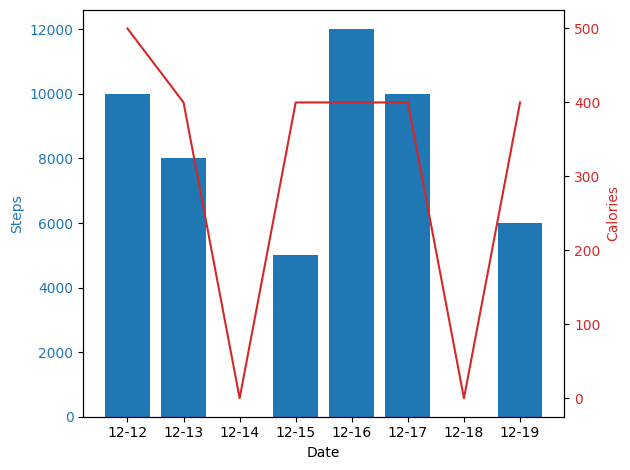

({'steps': 10000, 'calories': 500},
 {'total_steps': 51000, 'total_calories': 2500, 'days_counted': 6})

In [2]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

class ActivityTracker:
    def __init__(self):
        self.data = {}

    def add_activity(self, date, steps, calories):
        self.data[date] = {'steps': steps, 'calories': calories}

    def view_activity(self, date):
        return self.data.get(date, "No activity recorded on this date")

    def activity_stats(self, start_date, end_date):
        start = datetime.strptime(start_date, "%m-%d")
        end = datetime.strptime(end_date, "%m-%d")
        delta = timedelta(days=1)

        total_steps = 0
        total_calories = 0
        days_counted = 0

        while start <= end:
            date_str = start.strftime("%m-%d")
            if date_str in self.data:
                total_steps += self.data[date_str]['steps']
                total_calories += self.data[date_str]['calories']
                days_counted += 1
            start += delta

        return {
            'total_steps': total_steps,
            'total_calories': total_calories,
            'days_counted': days_counted
        }
        
    def plot_activity(self, start_date, end_date):
        start = datetime.strptime(start_date, "%m-%d")
        end = datetime.strptime(end_date, "%m-%d")
        delta = timedelta(days=1)

        dates = []
        steps_data = []
        calories_data = []

        while start <= end:
            date_str = start.strftime("%m-%d")
            dates.append(date_str)
            if date_str in self.data:
                steps_data.append(self.data[date_str]['steps'])
                calories_data.append(self.data[date_str]['calories'])
            else:
                steps_data.append(0)
                calories_data.append(0)
            start += delta

        fig, ax1 = plt.subplots()

        color = 'tab:blue'
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Steps', color=color)
        ax1.bar(dates, steps_data, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  
        color = 'tab:red'
        ax2.set_ylabel('Calories', color=color)
        ax2.plot(dates, calories_data, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  
        plt.show()

tracker = ActivityTracker()
tracker.add_activity("12-12", 10000, 500)
tracker.add_activity("12-13", 8000, 400)
tracker.add_activity("12-15", 5000, 400)
tracker.add_activity("12-16", 12000, 400)
tracker.add_activity("12-17", 10000, 400)
tracker.add_activity("12-19", 6000, 400)

tracker.plot_activity("12-12", "12-19")
example_activity = tracker.view_activity("12-12")
example_stats = tracker.activity_stats("12-12", "12-19")


example_activity, example_stats

